# Capstone Project : Building Book Recommendation System

## Problem Statement

Sapna Book House, Bangalore is an Indian book Store Chain. It is one of the biggest book shops in India. They sell books Online via www.sapnaonline.com.

They want to build the book recommendation engine which converts the shoppers to Customers. They want the recommendation engine to show their customers that they are valued as an individual by showing the options that meet his/her interest. 


In Data Science , I can express my problem statement as
Building Book Recommendation System using Content Based Filtering , User-Item Based Collaborative Filtering and Matrix Factorisation(Truncated SVD algorithm)

## Executive Summary

Recommendation systems have been keeping my mind occupied for quite a while now and owing to my children's inclination for reading books, building book recommendation system is quite engaging

### Recommendation System:
Recommendation engine filters the data using different algorithms and recommends the most relevant items to users. It first captures the past behaviour of a customer and based on that, recommends products which the users might be likely to buy.

If we can recommend a few items to a customer based on their needs and interests, it will create a positive impact on the user experience and lead to frequent visits.

Hence, businesses now a days are building smart and intelligent recommendation engines by studying the past behaviour of their users.

My journey to building Book Recommendation System began when I came across Book Crossing dataset. This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale range from 1-10(higher values denoting higher appreciation) and implicit rating is expressed by 0.

Here Explicit data is information that is provided intentionally i.e, input from the users such as book ratings while the implicit data is information that is not provided intentionally but gathered data streams like search history, clicks, order history, etc.


The following Data Science Process was carried out.

- Problem Statement
- Data Collection
- Data Cleaning & EDA
- Data Visualisation
- Content Based Recommendation
- Item-Item Based Recommendation
- Truncated SVD algorithm
- Conclusion and Improvements needed.

### Contents:
- [Import Libraries](#Import=libraries)
- [Load Data](#Load-Data)
- [Clean Books Dataset](#Cleaned-Books-Dataset)
- [EDA on Books Dataset](#EDA-Books-Dataset)
- [Clean Users Dataset](#Cleaned-Users-Dataset)
- [EDA on Users Dataset](#EDA-Users-Dataset)
- [Clean Ratings Dataset](#Cleaned-Ratings-Dataset)
- [EDA Ratings Dataset](#EDA-Ratings-Dataset)

Dataset: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

First we will load all the necessary libraries

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We load the dataset and check the shapes of books, users and ratings dataset as below.

## Read Dataset with necessary features

In [480]:
books = pd.read_csv('../Datasets/BX-Books.csv', sep = ';',error_bad_lines = False, encoding = "latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\sapna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [481]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS','imageUrlM', 'imageUrlL' ]

In [482]:
books.head(2)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg


In [483]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


<h2><center>Books Data Dictionary</center></h2>

|Feature|Type|Description|
|---|---|---|
|ISBN|Object|ISBN is the acronym for International Standard Book Number. This 10 or 13-digit number identifies a specific book, an edition of a book, or a book-like product (such as an audiobook)|
|BookTitle|Object|The title of a book, or any other published text or work of art, is a name for the work which is usually chosen by the author|
|BookAuthor|Object|Who wrote the book|
|Year of Publication|Object|The publication date is the date on which a patent application is first published. It is the date on which the document is made available to the public, thereby making it part of the state of the art.|
|Publisher|Object|Publishers manage the manuscript editing, design and production process, using a team of editors, proofreaders, graphic designers and printers. They provide schedules for each stage of the process, working backwards from the planned publication date.|
|ImageUrlS|Object|The URL is the address that points to the image on the net. With that address, you can insert the image in emails, for example. Identifying and copying an image's URL is easy if you can see the picture, graphic, chart, sketch, or drawing in your browser.|
|ImageUrlM|Object|Medium sized URL image|
|ImageUrlL|Object|Large sized URL image|

In [484]:
books.shape

(271360, 8)

In [485]:
users = pd.read_csv('../Datasets/BX-Users.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')

In [486]:
users.columns = ['userID', 'Location', 'Age']

In [487]:
users.head(2)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [488]:
users.shape

(278858, 3)

In [489]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


<h2><center>User Data Dictionary</center></h2>

|Feature|Type|Description|
|---|---|---|
|userID|int64|User ID Numbers is associated with each user name is a user identification number (UID). The UID number identifies the user name to any system on which the user attempts to log in. And, the UID number is used by systems to identify the owners of files and directories|
|Location|object|location are used to identify the place where the user stay.|
|Age|float|Age of the user|

In [490]:
ratings = pd.read_csv('../Datasets/BX-Book-Ratings.csv', sep = ';', error_bad_lines = False, encoding = 'Latin-1')

In [491]:
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [492]:
ratings.head(2)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5


In [493]:
ratings.shape

(1149780, 3)

In [494]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<h2><center>Rating Data Dictionary</center></h2>

|Feature|Type|Description|
|---|---|---|
|userID|int|User ID Numbers is associated with each user name is a user identification number (UID). The UID number identifies the user name to any system on which the user attempts to log in. And, the UID number is used by systems to identify the owners of files and directories|
|ISBN|Object|ISBN is the acronym for International Standard Book Number. This 10 or 13-digit number identifies a specific book, an edition of a book, or a book-like product (such as an audiobook)|
|Ratings|int|a measurement of how good or popular the book is|


We can see the dataset is big enough. The amount of data dictates how good the recommendations of the model can get. In a book recommendation system, the more ratings users give to books, the better the recommendation get for other users. 

Now let's dive in deep to see all the columns in the three dataset.

# Books
Exploring each of these datasets one by one and beginning with books dataset, we can see that image URLs columns do not seem to be required for analysis, and they can be dropped off. 

## Drop imageUrlS, imageUrlM, imageUrlL columns 

In [495]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis = 1, inplace = True)

In [496]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

## Checking for null values of the remaining column

In [497]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

Looks like there are some null values in author and publisher column. Lets google and find who are the authors and publisher of the respective books and fill the null values.

In [498]:
books[books.isna().any(axis = 1)]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


After googling, we can see that the publisher of Tyrant Moon and Finders Keepers are Mundania Press LLC and Bantam respectively while the author of the The Credit Suisse Guide to Managing Your Person is Steve Cavanagh and hence filled null values. 

In [499]:
books.loc[books.ISBN == '193169656X','publisher'] = 'Mundania Press LLC'

In [500]:
books.loc[books.ISBN == '193169656X','publisher'].fillna('Mundania Press LLC', inplace = True)

In [501]:
books.loc[books.ISBN == '1931696993', 'publisher'] = 'Bantam'

In [502]:
books.loc[books.ISBN == '9627982032', 'bookAuthor'] = 'Steve Cavanagh'

In [503]:
books[books.isna().any(axis = 1)]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


All the null values are gone.

### ISBN column
Ths ISBN numbers contain some letters and so we cannot covert them to numeric values. Will leave them as strings.
To count the unique values of ISBN column. 

In [504]:
len(books['ISBN'].unique())

271360

We can infer all the values of ISBN are different. We can interpret that the ISBN of all the books in the dataset are different.

### BookTitle column 

In [505]:
len(books['bookTitle'].unique())

242135

In [506]:
books['bookTitle'].value_counts()[:10]

Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Adventures of Huckleberry Finn    20
Dracula                           20
The Secret Garden                 20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: bookTitle, dtype: int64

We dont see any unsual in the two columns.

In [507]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see that the year of Publication is ranging from 0 to 2050. 

There are some incorrect entries in Year of Publication. Looks like publisher such as DK Publishing Inc and Gallimard have been incorrectly loaded to publishing year and also we can see there are some values which has number '0'.

We will check and make necessary corrections one by one and set the data type as integer. 

In [508]:
books.loc[books.yearOfPublication == 'DK Publishing Inc', :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [509]:
books.loc[books.ISBN =='078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = 'Michael Teitelbaum'
books.loc[books.ISBN == '078946697X', 'publisher'] = 'DK Publishing Inc'

In [510]:
books.loc[books.ISBN =='0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = 'James Buckley'
books.loc[books.ISBN == '0789466953', 'publisher'] = 'DK Publishing Inc'

In [511]:
books.loc[books.yearOfPublication == 'DK Publishing Inc', :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


So, We have put in place all the values properly of DK Publishing Inc. Now lets change the details of Gallimard

In [512]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [513]:
books.loc[books.ISBN == '2070426769', 'yearOfPublication']= 2003
books.loc[books.ISBN == '2070426769', 'publisher']= 'Gallimard'
books.loc[books.ISBN == '2070426769', 'bookAuthor']= 'Jean-Marie Gustave Le Clezio '

In [514]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [515]:
books.yearOfPublication=pd.to_numeric(books.yearOfPublication)

In [516]:
zero_yr= books[books.yearOfPublication == 0].yearOfPublication.count()
nan_yr= books.yearOfPublication.isnull().sum()

In [517]:
print(f' There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')

 There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


In [518]:
# Replace all years of zero with NaN
books.yearOfPublication.replace(0, np.nan, inplace=True)

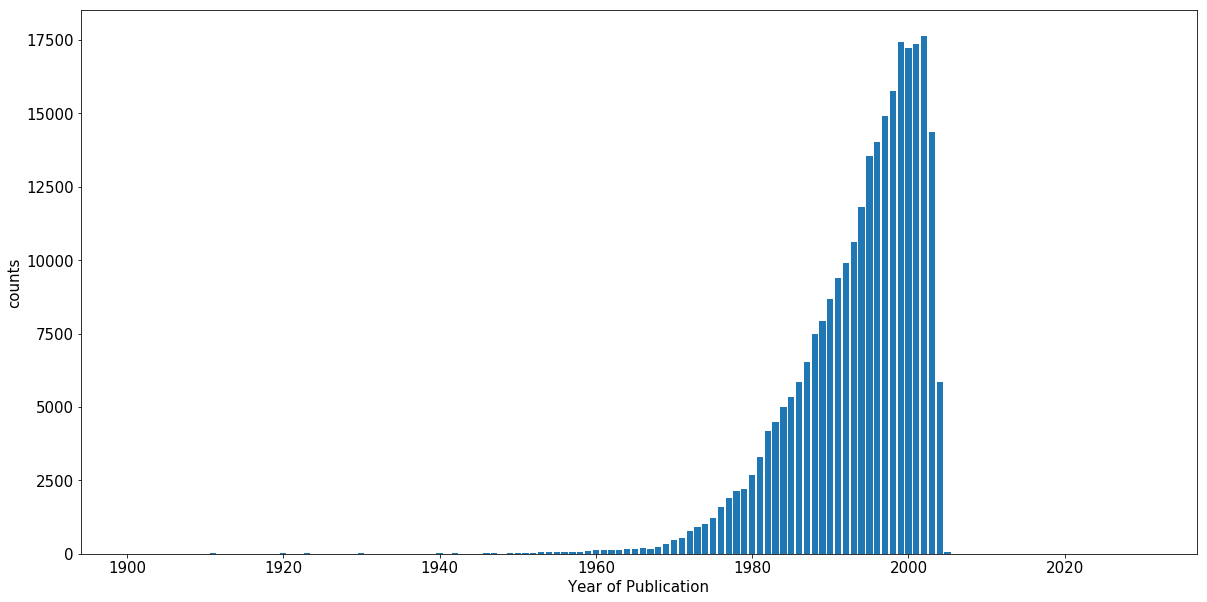

In [519]:
yr = books.yearOfPublication.value_counts().sort_index()
yr = yr.where(yr>5) # filter out counts less than 5
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(yr.index, yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

Note that in the plot above we filtered out counts less than 5, as there are a few books in the dataset with publication years in the 1300s, and a few in the future (?!). The plot above show the general trend that more recent books are much more frequent.

Let's take a look at some of those 'outlier' books. Maybe we'll even keep them as a separate dataset so we can filter them out if we need to later in the analysis. We'll leave them in for now, and then figure out how to handle them once we have more info later on.

In [520]:
historical_books = books[books.yearOfPublication<1900]
historical_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
171817,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable American Authors)",Benjamin Franklin,1806.0,Reprint Services Corp
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus
245607,0781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS American Literature)",Silas Weir Mitchell,1897.0,Reprint Services Corp
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz


In [521]:
books.loc[books.ISBN =='9643112136','yearOfPublication'] = 2010
books.loc[books.ISBN =='0781268001','yearOfPublication'] = 2002


In [522]:
historical_books = books[books.yearOfPublication<1900]
historical_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
171817,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable American Authors)",Benjamin Franklin,1806.0,Reprint Services Corp
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz


In [523]:
books_from_the_future = books[books.yearOfPublication>2018]
books_from_the_future.head(2)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
30010,068160204X,The Royals,Kitty Kelley,2020.0,Bausch &amp; Lombard
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS),Coville,2030.0,Aladdin


In [524]:
books.loc[books.ISBN =='068160204X','yearOfPublication'] = 2010
books.loc[books.ISBN =='0671746103','yearOfPublication'] = 1991
books.loc[books.ISBN =='0671791990','yearOfPublication'] = 2005
books.loc[books.ISBN =='0870449842','yearOfPublication'] = 1994
books.loc[books.ISBN =='0140301690','yearOfPublication'] = 2012
books.loc[books.ISBN =='068107468X','yearOfPublication'] = 2009
books.loc[books.ISBN =='0140201092','yearOfPublication'] = 1950
books.loc[books.ISBN =='0394701658','yearOfPublication'] = 1952
books.loc[books.ISBN =='3442436893','yearOfPublication'] = 2009
books.loc[books.ISBN =='0590085417','yearOfPublication'] = 2009
books.loc[books.ISBN =='0870446924','yearOfPublication'] = 2003
books.loc[books.ISBN =='0671266500','yearOfPublication'] = 2004
books.loc[books.ISBN =='068471941X','yearOfPublication'] = 1929
books.loc[books.ISBN =='0684718022','yearOfPublication'] = 1986
books.loc[books.ISBN =='0380000059','yearOfPublication'] = 2013
books.loc[books.ISBN =='068471809X','yearOfPublication'] = 1937
books.loc[books.ISBN =='0671740989','yearOfPublication'] = 1991



In [525]:
books_from_the_future = books[books.yearOfPublication>2018]
books_from_the_future                              

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


I think we can probably omit the 'historical_books' as they may potentially skew the model and do not seem to have much relevance to the wider userbase.

I have googled all the history and future books and change the year of publication accordingly.

In [526]:
print(f'Length of books dataset before removal: {len(books)}')
books = books.loc[~(books.ISBN.isin(historical_books.ISBN))] # remove historical books

print(f'Length of books dataset after removal: {len(books)}')

Length of books dataset before removal: 271360
Length of books dataset after removal: 271358


### Publisher

In [527]:
books.publisher.value_counts()[:10]

Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64

In [528]:
books.publisher = books.publisher.str.replace('&amp', '&', regex = False)


In [529]:
uniq_books = books.ISBN.nunique()
all_books = books.ISBN.count()
print(f'No. of unique books: {uniq_books} | All book entries: {all_books}')

No. of unique books: 271358 | All book entries: 271358


Let's look at the most frequent Publishing houses in the dataset.

In [530]:
top_publishers = books.publisher.value_counts()[:10]
print(f'The 10 publishers with the most entries in the books table are:\n{top_publishers}')

The 10 publishers with the most entries in the books table are:
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &; Schuster           2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64


In [531]:
empty_string_publisher = books[books.publisher == ''].publisher.count()
nan_publisher = books.publisher.isnull().sum()
print(f'There are {empty_string_publisher} entries with empty strings, and {nan_publisher} NaN entries in the Publisher field')

There are 0 entries with empty strings, and 0 NaN entries in the Publisher field


## Book Author


In [532]:
empty_string_author = books[books.bookAuthor == ''].bookAuthor.count()
nan_author = books.bookAuthor.isnull().sum()
print(f'There are {empty_string_author} entries with empty strings, and {nan_author} NaN entries in the Author field')

There are 0 entries with empty strings, and 0 NaN entries in the Author field


What about authors with the most entries?

In [533]:
top_authors = books.bookAuthor.value_counts()[:10]
print(f'The 10 authors with the most entries in the books table are:\n{top_authors}')

The 10 authors with the most entries in the books table are:
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: bookAuthor, dtype: int64


## Book titles

In [534]:
top_titles = books.bookTitle.value_counts()[:10]
print(f'The 10 book titles with the most entries in the books table are:\n{top_titles}')

The 10 book titles with the most entries in the books table are:
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: bookTitle, dtype: int64


This is actually quite an important observation. Although all of the ISBN entries are unique in the 'books' dataframe, different forms of the same book will have different ISBNs - i.e. paperback, e-book, etc. Therefore, we can see that some books have multiple ISBN entries (e.g. Little Women  has 24 different ISBNs, each corresponding to a different version of the book).

Let's take a look at, for example, the entries for 'Little Women'.

In [535]:
books[books.bookTitle == "Little Women"]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
3952,185854176X,Little Women,Louisa M. Atcott,1995.0,Brimax Books Ltd
4330,0861782356,Little Women,Louisa May Alcott,NaN,Octopus Publising Group Plc
12227,0590203509,Little Women,Louisa May Alcott,1994.0,Scholastic
20676,0440447682,Little Women,Louisa May Alcott,1990.0,Yearling Books
32837,1550134140,Little Women,Louisa May Alcott,NaN,Firefly Books Ltd
52210,0451529308,Little Women,Louisa May Alcott,2004.0,Signet Classics
52551,0451518144,Little Women,Louisa May Alcott,1983.0,Signet Book
53358,0590437976,Little Women,Louisa May Alcott,1992.0,Scholastic
57432,0195813898,Little Women,Alcott,1985.0,Oxford University Press
72168,0785788727,Little Women,Louisa May Alcott,1999.0,Sagebrush Bound


## Users Dataset

Now we will explore users dataset, firstly by checking its shape, first few columns and data types

In [536]:
users.head(2)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


The user_ID field is integers, Locations are strings and the age values are floats.

In [537]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

The age range goes from 0 to 244 years old. Obviously these cannot be true. I'll set all ages less than 5 and older than 100 to NaN to try keep them realistic. Since, I am not considering the age as my feature for modelling, i will leave the unrealisitic ages as NaN values. 

In [538]:
users.loc[(users.Age < 5) | (users.Age > 100), 'Age'] = np.nan

Now let's have a look at the entire age range again

In [539]:
print(sorted(users.Age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


Much better - now the ages go from 5 to 100, with missing values entered as NaN. Let's plot this to see how they are distributed.

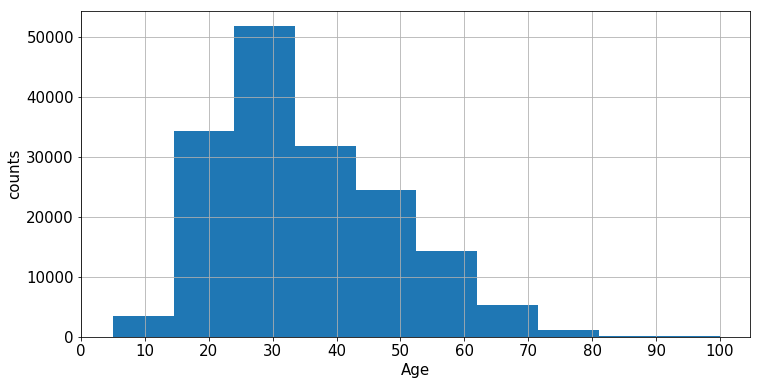

In [540]:
# First create a histogram of the Age field
ax = users.Age.hist(bins = 10, figsize = (12,6))
ax.set_xlabel('Age')
ax.set_ylabel('counts')
ax.set_xticks(range(0,110,10))
plt.show()

Below is the same plot without any binning - i.e. each age is represented individually.

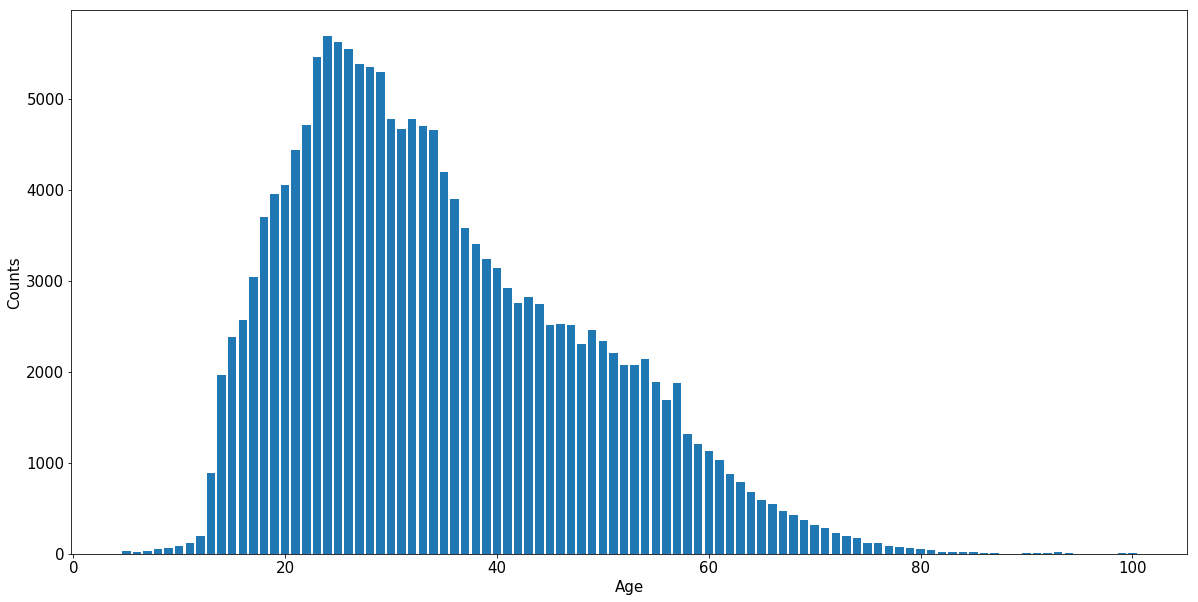

In [541]:
u = users.Age.value_counts().sort_index()
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size' : 15})
plt.bar(u.index , u.values)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()


That is more clear to me! It seems that most of our reviewers are in their late 20s to early 30s.

## Location

Let us split the location column into city, state and country for some pre processing.

In [542]:
#Note: Used Pandas Series.str.split method as it has an 'expand' parameter which can handle None cases
user_location_expanded = users.Location.str.split(',', 2, expand = True)
user_location_expanded.columns = ['city', 'state','country']
users = users.join(user_location_expanded)


In [543]:
users.drop(columns = ['Location'], inplace = True)
users.head()

,userID,Age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [544]:
top_cities = users.city.value_counts()[:10]
print(f'The 10 cities with the most users are :\n{top_cities}')

The 10 cities with the most users are :
london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: city, dtype: int64


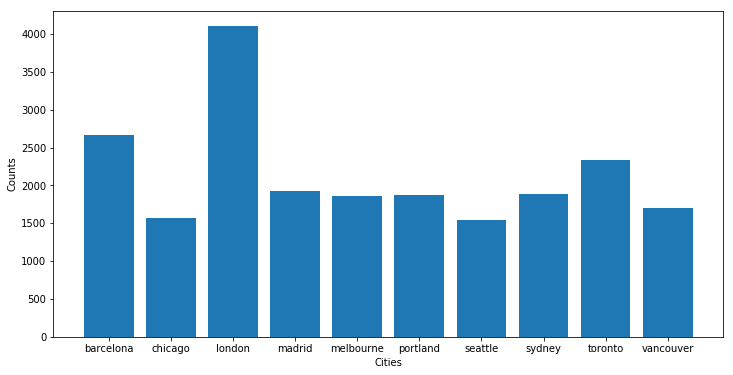

In [545]:
cities = top_cities.sort_index()
plt.figure(figsize = (12,6))
plt.rcParams.update({'font.size' : 10})
plt.bar(cities.index , cities.values)
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.show()

In [546]:
top_countries = users.country.value_counts()[:10]
print(f'The 10 countries with the most users are:\n{top_countries}')

The 10 countries with the most users are:
 usa               139183
 canada            21556 
 united kingdom    18286 
 germany           17021 
 spain             13088 
 australia         11719 
 italy             11238 
                   4561  
 france            3440  
 portugal          3305  
Name: country, dtype: int64


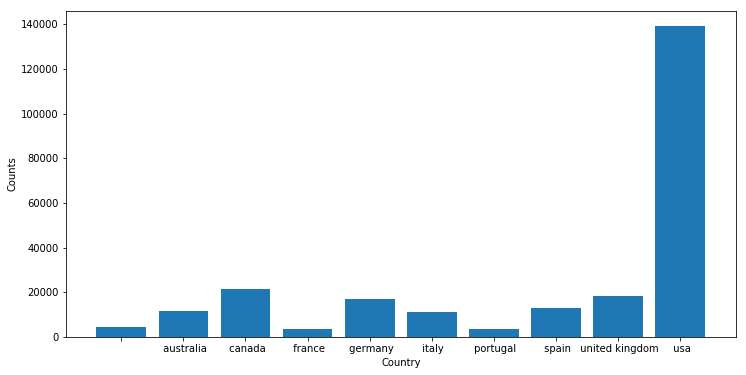

In [547]:
country = top_countries.sort_index()
plt.figure(figsize = (12,6))
plt.rcParams.update({'font.size' : 10})
plt.bar(country.index , country.values)
plt.xlabel('Country')
plt.ylabel('Counts')
plt.show()

It looks like an empty 'Country field is in the top 10 most common entries.

In [548]:
users[users.country == ''][:5]

,userID,Age,city,state,country
18,19,14.0,weston,,
90,91,NaN,toronto/newmarket,,
311,312,NaN,lk,jlk,
317,318,NaN,berlin,n/a,
536,537,NaN,davis,california,


We can change the values of the empty strings of the country by looking at the city and state but there are 4561 rows and filling it up individally will be time consuming. As we are not using this as the feature for modelling, we will probably change these empty strings to NaNs.

## Ratings Dataset

In [549]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [550]:
ratings.shape

(1149780, 3)

In [551]:
ratings.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

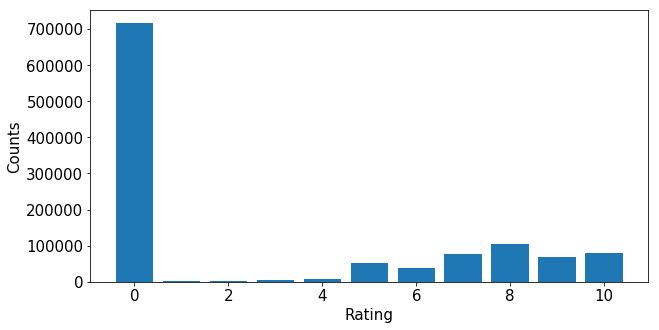

In [552]:
rtg = ratings['bookRating'].value_counts().sort_index()

plt.figure(figsize = (10,5))
plt.rcParams.update({'font.size' : 15})
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

In [553]:
ratings.bookRating.value_counts()

0     716109
8     103736
10    78610 
7     76457 
9     67541 
5     50974 
6     36924 
4     8904  
3     5996  
2     2759  
1     1770  
Name: bookRating, dtype: int64

We can see nearly 716 thousand bookrating has 0 values which shows implict ratings

In [554]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [555]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]
ratings_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [556]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031134, 3)


It is evident that the users have rated some of the books which are not part of the original books dataset. 

In [557]:
ratings_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


The explicit ratings represented by 1 - 10 and implicit ratings is represented by 0 will have to be segregated now. We will be using only explict ratings for building our recommendation system. 
Similarly, users are also segregated into those who rated explicitly and those whose implicit behaviour was recorded.
We are using only explicit ratings and users who have rated for recommendation.

In [558]:

explicit_rating = ratings_new[ratings_new.bookRating != 0]


In [559]:
explicit_rating.head()
print(explicit_rating.shape)

(383840, 3)


In [560]:
ratings = explicit_rating
ratings.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


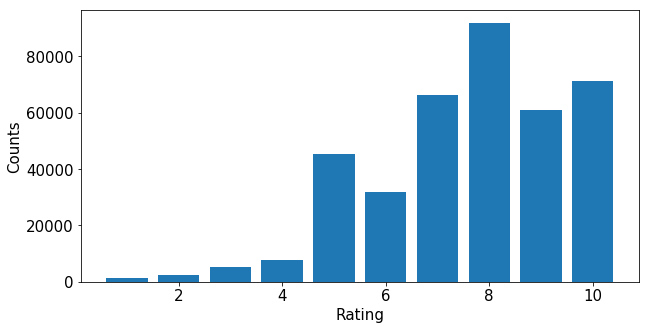

In [561]:
rtg = ratings['bookRating'].value_counts().sort_index()

plt.figure(figsize = (10,5))
plt.rcParams.update({'font.size' : 15})
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

From the above graph we can see the majority of the users have rated in the range from 5 to 10.

In [562]:
ratings.shape

(383840, 3)

In [563]:
implicit_ratings = ratings_new[ratings_new.bookRating == 0]

In [564]:
user_exp_ratings = users[users.userID.isin(ratings.userID)]


In [565]:
user_exp_ratings.head()

,userID,Age,city,state,country
7,8,NaN,timmins,ontario,canada
8,9,NaN,germantown,tennessee,usa
11,12,NaN,fort bragg,california,usa
13,14,NaN,mediapolis,iowa,usa
15,16,NaN,albuquerque,new mexico,usa


In [566]:
users = user_exp_ratings
users.shape

(68091, 5)

In [567]:
user_imp_ratings = users[users.userID.isin(implicit_ratings.userID)]

So, we have explicit and implicit ratings and users seperately. Let us save all  the cleaned dataframes and store as csv file.

In [568]:
books.to_csv('../Datasets/cleaned_books.csv', index = False)

In [569]:
users.to_csv('../Datasets/cleaned_users.csv', index = False)

In [570]:
ratings.to_csv('../Datasets/cleaned_ratings.csv', index = False)